In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [200]:
# Fetch the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
df['MedHouseVal'] = california_housing.target

# Display the DataFrame
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [201]:
df =df.drop(['Latitude','Longitude'], axis=1)

X variables - predictor variables - independent variables

- MedInc         float64
- HouseAge       float64
- AveRooms       float64
- AveBedrms      float64
- Population     float64
- AveOccup       float64
- MedHouseVal    float64

**Y = MedHouseVal = f(x1, x2, x3, x4, x5, x6)**

- f for a Linear Regression has the template
- y = mx + b
- PredictedMedHouseVal = iNTERCEPT + M1X1 + M2X2 + M3X3 + M4X4 + M5X5 + M6X6
- PredictedMedHouseVal = Intercept + m1Medinc + m2HouseAge + m3AveRooms + m4AveBedrms + m5Population + m6AveOccup

** Intercept - model.intercept_**

** Coefficients - model.coef_**

In [202]:
#model with all x values
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
MedHouseVal    float64
dtype: object

In [203]:
from sklearn.linear_model import LinearRegression
#Logistic regression - category - 0/1, T/F, (R,G,B)
#Linear regression - number

In [204]:
model = LinearRegression()

In [205]:
X = df.drop(['MedHouseVal'], axis=1)

In [206]:
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
dtype: object

In [207]:
y = df['MedHouseVal']

##Split our Data

80% train

20% test

Training the model on 80% of the data.

Testing the model on 20% of the data.

- X_train: 80% of the rows from X
- X_test: 20% of the rows from X

- y_trains: 80% of th erows from y
- y_teste: 20% of the rows from y

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
#Slipt the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [210]:
model.fit(X_train, y_train)

LinearRegression()

In [211]:
model.intercept_

-0.5528727644615126

In [212]:
model.coef_

array([ 5.46160779e-01,  1.67879091e-02, -2.23919944e-01,  1.11549261e+00,
        2.31671974e-05, -4.61823135e-03])

The nearest the number i to zero, less important it is to the model, so we can remove it.

- PredictedMedHouseVal = Intercept + m1Medinc + m2HouseAge + m3AveRooms + m4AveBedrms + m5Population + m6AveOccup

- PredictedMedHouseVal = -0.5528727644615126 + 5.46160779e-01 + 1.67879091e-02 + -2.23919944e-01 + 1.11549261e+00 + 2.31671974e-05 + -4.61823135e-03

---



In [213]:
X_train.shape

(16512, 6)

In [214]:
X_test.shape

(4128, 6)

In [215]:
y_pred = model.predict(X_test)

In [216]:
y_pred

array([1.00100537, 1.56005635, 2.67713262, ..., 4.36752832, 1.50136763,
       1.95368721])

In [217]:
# actual - y_predict
#pred - y_pred - equation of the line
#residuals: actual - pred

residuals = y_test - y_pred

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.300e+01, 1.240e+02,
        2.974e+03, 8.520e+02, 1.490e+02, 1.400e+01]),
 array([-9.2329184 , -7.86365287, -6.49438734, -5.12512181, -3.75585628,
        -2.38659075, -1.01732522,  0.35194031,  1.72120584,  3.09047136,
         4.45973689]),
 <BarContainer object of 10 artists>)

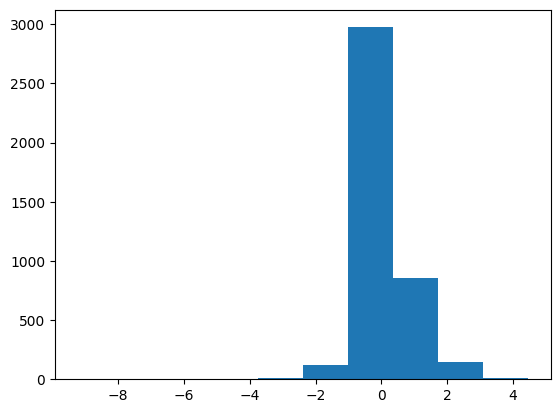

In [218]:
import matplotlib.pyplot as plt
plt.hist(residuals)

Residual analysis:

Distribution: Normal
Mode: -1 to 0


In [219]:
residuals.mean()

0.0005506780243644342

In [220]:
residuals.mode()

0      -9.232918
1      -4.159108
2      -3.583130
3      -3.126984
4      -2.986501
          ...   
4123    3.571417
4124    3.573198
4125    3.846377
4126    4.169522
4127    4.459737
Name: MedHouseVal, Length: 4128, dtype: float64

In [221]:
residuals.median()

-0.14378792905649418

In [222]:
residuals.min()

-9.232918396591842

In [223]:
residuals.max()

4.459736893862398

In [224]:
residuals.std()

0.8014627467582752

## Residual Analysis Broken down

- Distribution: Skinny Normal Distribution. Sd are close to each other.
- Mode: -1 to 0

## Minimum: -9.

- For specif row of values, the model is predicting too high
- the formula for residuals is actual - pred. When you have a negative residual value, your predicted values are much higher than the actual.
- The model is overestimating the value of the house.

##Maximum: 4.

- For specif row of values, the model is predicting too low
- The formula for residuals is actual - pred. When you have a positive residual value, your predicted values are much lower than the actual.
- The model is underestimating the value of the house.

##Mean: 0.

##Mode: -1

- For specif row of values, the model is predicting too high.
- The formula for residuals is actual - pred. When you have a negative residual value, your predicted values are much higher than the actual.
- The model is overestimating the value of the house.
- However, since th emode is -1, the value is actually minimal. So model can potentialli be accepted given the scale of the house prices.

## R2 and MSE

In [225]:
from sklearn.metrics import mean_squared_error, r2_score

In [226]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

0.642187231453487
0.5099337366296416


## R2 score - captures the variance in the model

- It is between a scale of 0 to 1.
- The closer it is to 1, the better the model.
- The closer it is to 1, the more variance is captured.

- For each point of unique values, the model is generation a different result.
- Rhe same equation of the line, is giving different results, which is something that is accepted.
- Rules of thumb - You want to be as general as possible, but also as specif as possible.
- General part - equation of a line
- Specific part - each solution is different
- R2 is a measure of how well the model is generic and specific.

In [227]:
print(r2)

0.5099337366296416


-Usually the scale isthe scale is 0 - 0.5 bad
- 0.5 to 0.8 is decent and can be improved
- 0.8 - 1 is a good model

For our model:

Decent - BASELINE - The worst a model can do. Lowest r2 score is 0.51

In [228]:
#find the absolute error and squares it
print(mse)

0.642187231453487



* Generally my model has an error of +-0.64.
* The predicted value is usually 0.64 lower or 0.64 higher than the actual value of the house.
* Ideally, you want MSE to be 0.

## Overall R2, MSE and Residuals

* R2 - 0.51
* MSE - 0.64
* Residual - -1.

This is a very average model, the residuals and MSE are acceptable. however, the R2 is very small and does not capture as much variance in the model. Next steps we will remove outliers, standardize the data, remove variables, to improve the model performanc.

## Model Improvement - Outliers removal

- Boxplot and remove the outliers and then run the model again. You will now have model 2, which again has then new equation of a line.
- Run the same steps, then you compare metrics which are going to be your residulas, R2 and MSE to the baseline.
- If the model does worse keep the outliers.
- If the model does better, move on to improve it more.

#### Model Improvement - Standardize

* All variables on the same scale. The boxplots look a lot more even.
* When your variables are on the same scale, it means that each variable is given the same amount of importance.
* List item
* Run the model, compare metrics and make a decision.


## Model Improvement - removing/Adding variables

##Removal/Keeping of variables based on p-values
- From your model results you have the coefficients. these coefficients have a p-value. This p-value is tesiting for the level of significance.
- The p-value is a threshold. If it's lower/ upper, you would either keep or delete the variable.
- Ranks the importance of the variable

##Removal/Keeping of variables based on the coefficients
- From your model results you have the coefficients. These coefficients have a p-value. This weight is tesiting for the level of significance.





In [229]:
#p-values
import statsmodels.api as sm
import numpy as np

#Prepare your predictor variables (x) AND TARGET VARIABLE(Y)

#Add a constant term to the predictor variables
X =  sm.add_constant(X_train)



#Fit the regression model
model = sm.OLS(y_train, X_train)
result = model.fit()

#Retrieve the p-values
p_value = result.pvalues

print(p_value)

MedInc         0.000000e+00
HouseAge      7.378162e-165
AveRooms      2.108007e-182
AveBedrms     7.501425e-153
Population     3.166271e-04
AveOccup       9.724166e-18
dtype: float64


##MSE - Mean squared error

If the p -value is less than 0.005, then we keep the variable. If it is greater than 0.005 we remove it.

##Model 2

In [230]:
# Fetch the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
df['MedHouseVal'] = california_housing.target

# Display the DataFrame
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [231]:
#p-values
import statsmodels.api as sm
import numpy as np

#Prepare your predictor variables (x) AND TARGET VARIABLE(Y)

#Add a constant term to the predictor variables
X =  sm.add_constant(X_train)



#Fit the regression model
model = sm.OLS(y_train, X_train)
result = model.fit()

#Retrieve the p-values
p_value = result.pvalues

print(p_value)

MedInc         0.000000e+00
HouseAge      7.378162e-165
AveRooms      2.108007e-182
AveBedrms     7.501425e-153
Population     3.166271e-04
AveOccup       9.724166e-18
dtype: float64


In [232]:
model2 = LinearRegression()

In [233]:
X1 = df.drop(['MedHouseVal', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], axis=1)

In [234]:
y1 = df['MedHouseVal']

In [235]:
#Slipt the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                    test_size=0.2,
                                                    random_state=42)

In [236]:
model2.fit(X1_train, y1_train)

LinearRegression()

In [237]:
model2.intercept_

-0.16939866660034752

In [238]:
model2.coef_

array([0.43431898, 0.01764319, 0.04661222])

In [239]:
y1_pred = model2.predict(X1_test)

In [240]:
y1_pred

array([1.04950913, 1.51492009, 2.31479717, ..., 4.32450877, 1.72116012,
       1.72145295])

In [241]:
residuals2 = y1_test - y1_pred

(array([   2.,   13.,  116., 1541., 1577.,  564.,  193.,   90.,   26.,
           6.]),
 array([-3.40971267, -2.63163408, -1.85355548, -1.07547689, -0.29739829,
         0.4806803 ,  1.2587589 ,  2.03683749,  2.81491609,  3.59299468,
         4.37107328]),
 <BarContainer object of 10 artists>)

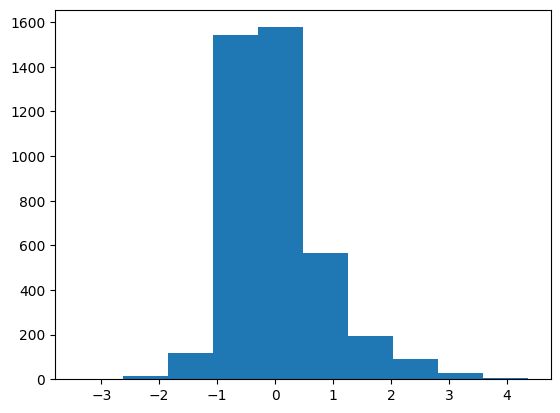

In [242]:
import matplotlib.pyplot as plt
plt.hist(residuals2)

In [243]:
residuals2.mean()

0.002202665410702365

In [244]:
residuals2.median()

-0.15123984080647745

In [245]:
residuals2.mode()

0      -3.409713
1      -3.184231
2      -2.474557
3      -2.402118
4      -2.351247
          ...   
4123    3.699981
4124    3.739495
4125    3.811968
4126    4.155694
4127    4.371073
Name: MedHouseVal, Length: 4128, dtype: float64

In [246]:
residuals2.min()

-3.4097126733305414

In [247]:
residuals2.max()

4.371073276907229

In [248]:
residuals2.std()

0.8148994852874344

In [249]:
from sklearn.metrics import mean_squared_error, r2_score

In [250]:
mse1 = mean_squared_error(y1_test, y1_pred)
r21 = r2_score(y1_test, y1_pred)
print(mse1)
print(r21)

0.6639051553248732
0.493360342954836


- PredictedMedHouseVal = -0.16939866660034752 + 0.43431898 + 0.0176431 + 0.04661222


## Model 3

In [256]:
df2 = df.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x785a90229c30>,
 'caps': [<matplotlib.lines.Line2D at 0x785a9022a170>,
 'boxes': [<matplotlib.lines.Line2D at 0x785a90229990>,
 'medians': [<matplotlib.lines.Line2D at 0x785a9022a6b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x785a9022a950>,
 'means': []}

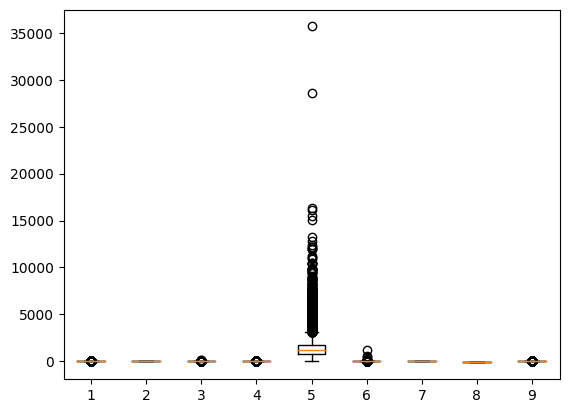

In [257]:
plt.boxplot(df2)

In [267]:
subset_df=df[df['AveOccup']<100]
subset_df=df[df['Population']<400]

{'whiskers': [<matplotlib.lines.Line2D at 0x785a8fcf1570>,
 'caps': [<matplotlib.lines.Line2D at 0x785a8fcf1ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x785a8fcf12d0>,
 'medians': [<matplotlib.lines.Line2D at 0x785a8fcf1ff0>,
 'fliers': [<matplotlib.lines.Line2D at 0x785a8fcf2290>,
 'means': []}

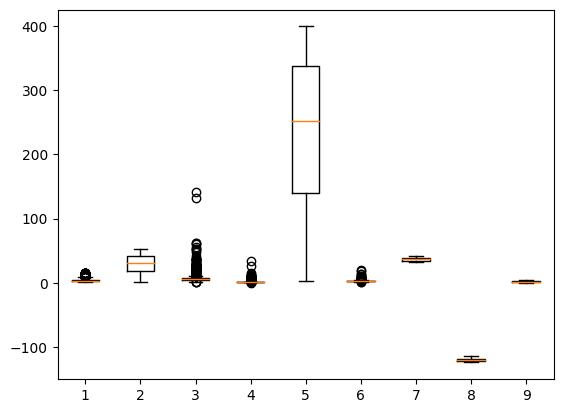

In [268]:
plt.boxplot(subset_df)

In [269]:
X2 = subset_df.drop(['MedHouseVal'], axis = 1)
y2 = subset_df['MedHouseVal']

In [ ]:
model3 = LinearRegression()

In [270]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                        test_size = 0.2,
                                                        random_state= 42)

In [271]:
model3.fit(X2_train, y2_train)

LinearRegression()

In [272]:
model3.intercept_

-32.773930682419234

In [273]:
model3.coef_

array([ 2.41180438e-01, -1.61168561e-03,  8.94643304e-02, -3.21294203e-01,
        5.07715607e-05, -1.38200757e-01, -4.63472649e-01, -4.24896819e-01])

In [276]:
y2_pred = model3.predict(X2_test)

In [277]:
residuals3 = y2_test - y2_pred

(array([ 1.,  5., 62., 97., 40., 27., 18.,  7.,  4.,  2.]),
 array([-2.60120362e+00, -1.95164413e+00, -1.30208463e+00, -6.52525138e-01,
        -2.96564430e-03,  6.46593850e-01,  1.29615334e+00,  1.94571284e+00,
         2.59527233e+00,  3.24483183e+00,  3.89439132e+00]),
 <BarContainer object of 10 artists>)

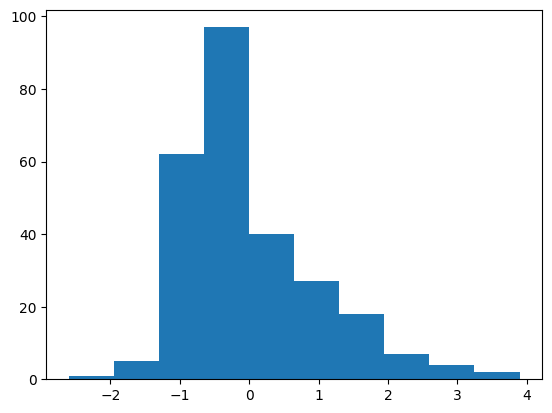

In [279]:
import matplotlib.pyplot as plt
plt.hist(residuals3)

## Model 4